

### **K-Means Clustering**


In [ ]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 67kB/s 
     |████████████████████████████████| 204kB 46.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=2238fa9a029b62ab73189454221e4980618e6798c702704e8e46e85be7775e76
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
#Importing Packages
import sys
from pyspark import SparkContext, SparkConf
import numpy as np
import random
import matplotlib as mplib
import matplotlib.pyplot as plt

In [ ]:
#Initializing Spark Context
sparkcontext = SparkContext("local","PySpark k_means")

In [ ]:
total_iteration = 20 #Global Iterations Value
k = 10 #Global K-cluster value

In [ ]:
#data file
file = "/content/data.txt"

In [ ]:
fileRDD = sparkcontext.textFile(file)
RDD = fileRDD.map(lambda line: [item for item in line.split(' ')])
dataRDD = RDD.map(lambda x: [float(i) for i in x])

In [ ]:
#Initializing new cluster centroids in random with probability Di
def newClusterCentroid(distance,data):
  d = np.array(distance)
  #probablity must be between 0 and 1
  sum_prob = d/d.sum()
  #Getting cumulative sum values
  cum_prob = sum_prob.cumsum()
  r = random.random()
  index = 0
  key = 0
  for i,j in enumerate(cum_prob):
    #Picking the least value through comparision
    if r <= j:
      index = j
      key = i
  centroid = data[key]
  return centroid

In [ ]:
# measure the squared Euclidean distance Di to the existing cluster centroids
def getFinalDistance(a,b):
  finalDist = 0
  for x,y in zip(a,b):
    dist  =  (x-y)
    sq = dist**2
    finalDist = finalDist+sq
  return finalDist

In [ ]:
def getDistace(centroid,points):
  dist = list()
  for i in points:
    d = 0
    for j in centroid:
      # Get max distance for farthest cluster centroid
      d = max(d,getFinalDistance(j,i))
    dist.append(d)
  return dist

In [ ]:
def getCentroids(data, numClusters):
  #random initialization of centriods
  centroids = data.takeSample(False, numClusters)
  return centroids

In [ ]:
centroids = getCentroids(dataRDD,10)

In [ ]:
#Euclidean distance
def getEuclideanDistance(a, b):
    eucDist = 0
    for i, j in zip(a, b):
        vals = (i - j)**2
        eucDist += vals
    return (eucDist)**(1/2)

In [ ]:
#Manhattan distance
def getManhattanDistance(a, b):
    manDist = 0
    for i, j in zip(a, b):
        #Getting Absolute value of i - j
        vals = abs(i-j)
        manDist += vals
    return (manDist)**(1/2)

In [ ]:
#Picking the cluster with the least calculated distance
def getClusterlabel(distance, points, centroids):
  index = min(distance, key=distance.get)
  return [index, points, distance[index]]

In [ ]:
#Update new cluster centriod values with each iteration
def getNewCentroids(label,centroids):
  cenVals = []
  for i in range(0,10):
    cen = []
    tempCen = None
    for j in label:
      if j[0] == i:
        cen.append(np.array(j[1]))
    if not cen:
      tempCen = centroids[i]
    else:
      tempCen = np.average(cen,axis = 0)
    cenVals.append(tempCen)
  return cenVals        

In [ ]:
def kMeansEucledianDistance(points,centroids):
  length = len(points)
  eucledianCost = np.zeros((total_iteration,2))
  eucledianCostDict = dict()
  i = 0
  while i < total_iteration:
    clabel = []
    i += 1
    temp = 0
    for l in range(0, length):
      distance = {}
      for c in range(0, k):
        distance[c] = getEuclideanDistance(points[l], centroids[c])
      label = getClusterlabel(distance, points[l], centroids)
      clabel.append(label)
      temp = temp + (label[2]**2)
    eucledianCostDict[i] = temp 
    eucledianCost[i-1,:] = np.array([i, temp])
    new_centroids = getNewCentroids(clabel,centroids)
    centroids = new_centroids
  return eucledianCost,eucledianCostDict

In [ ]:
def kMeansManhattanDistance(points,centroids):
  length = len(points)
  manhattanCost = np.zeros((total_iteration,2))
  manhattanCostDict = dict()
  i = 0
  while i < total_iteration:
    clabel = []
    i += 1
    temp = 0
    for l in range(0, length):
      distance = {}
      for c in range(0, k):
        distance[c] = getManhattanDistance(points[l], centroids[c])
      label = getClusterlabel(distance, points[l], centroids)
      clabel.append(label)
      temp = temp + (label[2]**2)
    manhattanCostDict[i] = temp 
    manhattanCost[i-1,:] = np.array([i, temp])
    new_centroids = getNewCentroids(clabel,centroids)
    centroids = new_centroids
  return manhattanCost,manhattanCostDict

In [ ]:
[eucledianCost,eucledianCostDict] = kMeansEucledianDistance(dataRDD.collect(),centroids)
print(eucledianCostDict)

{1: 803150040.4919723, 2: 705929684.7617171, 3: 647294309.7108635, 4: 555555044.3303144, 5: 527580143.3534354, 6: 510097768.14807135, 7: 494316662.5460482, 8: 482390356.5460858, 9: 475245842.6368497, 10: 470480252.24576837, 11: 466815402.5250923, 12: 464666766.2244399, 13: 463334431.2400587, 14: 462542256.65354913, 15: 462004581.9258603, 16: 461462462.9429456, 17: 461109887.62383044, 18: 460892091.14272445, 19: 460666336.23238456, 20: 460397886.6829213}


In [ ]:
[manhattanCost,manhattanCostDict] = kMeansManhattanDistance(dataRDD.collect(),centroids)
print(manhattanCostDict)

{1: 604285.7010000036, 2: 579496.7833093301, 3: 565786.6628831748, 4: 536396.7979424216, 5: 521525.6074733803, 6: 515442.0170954656, 7: 511336.1910731346, 8: 511450.68458457803, 9: 507951.6178313047, 10: 499507.92047575925, 11: 486600.50850361574, 12: 473819.9912256842, 13: 463253.1488465433, 14: 461057.40178008727, 15: 450618.4419257116, 16: 439002.1845334793, 17: 439891.0080702886, 18: 440375.47169517126, 19: 439287.5948504907, 20: 438273.66179653467}


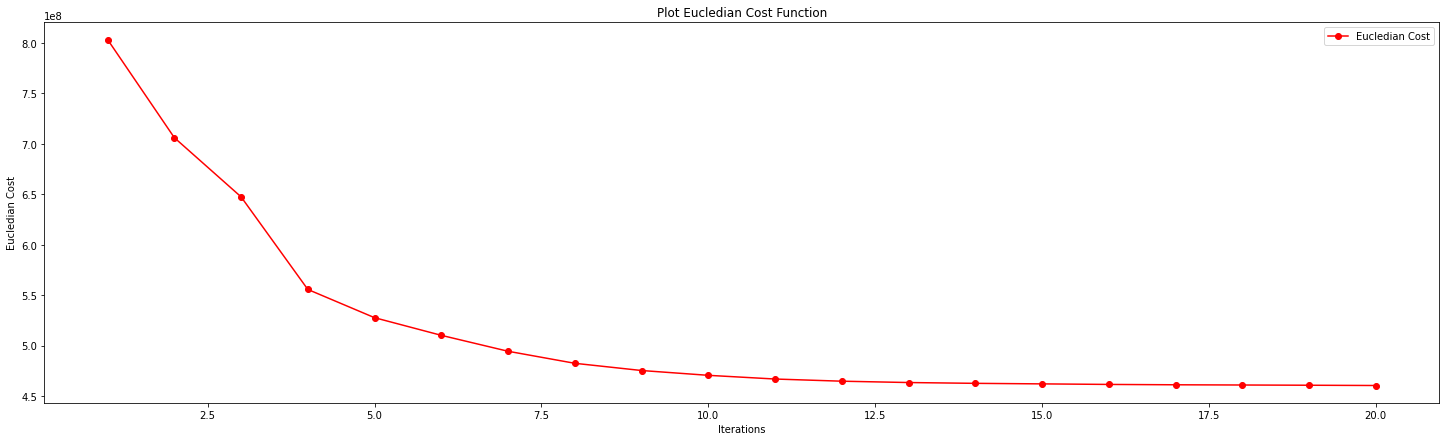

In [ ]:
plt.rcParams["figure.figsize"]=25,7
plt.plot(eucledianCost[:,0], eucledianCost[:,1], 'r',marker='o',label='Eucledian Cost')
plt.xlabel("Iterations")
plt.ylabel("Eucledian Cost")
plt.title("Plot Eucledian Cost Function")
plt.legend(loc='best')

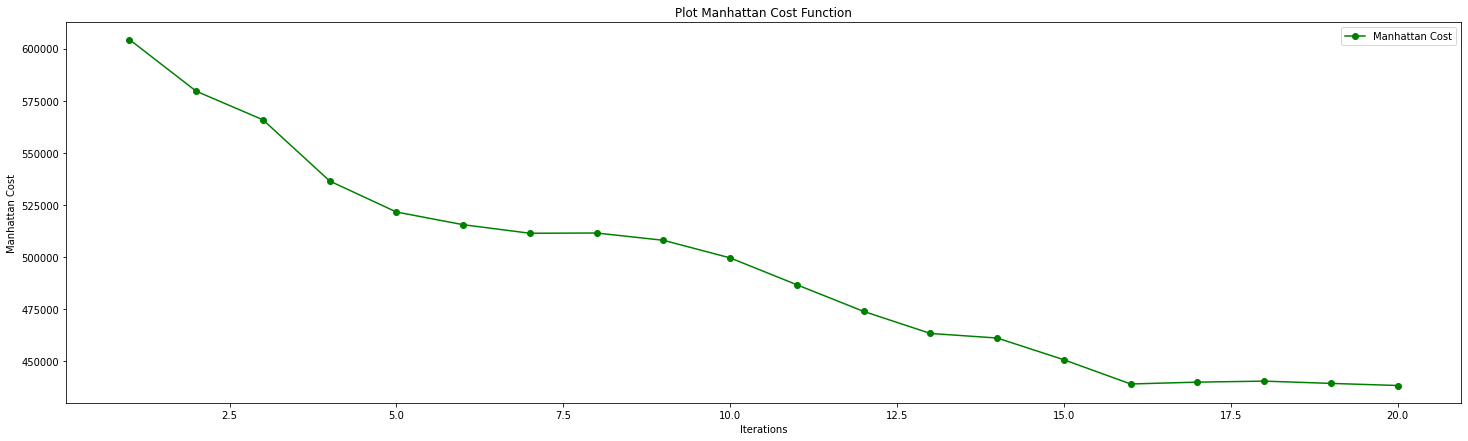

In [ ]:
plt.rcParams["figure.figsize"]=25,7
plt.plot(manhattanCost[:,0], manhattanCost[:,1],'g',marker='o',label='Manhattan Cost')
plt.xlabel("Iterations")
plt.ylabel("Manhattan Cost")
plt.title("Plot Manhattan Cost Function")
plt.legend(loc='best')